In [172]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [173]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

In [174]:
saved_style_state = matplotlib.rcParams.copy() #give us a style state to go back to

In [175]:
#sources
#https://www.facs.nsw.gov.au/download?file=648990
#http://insideairbnb.com/get-the-data.html

In [178]:
filepath = "FACS_Rent_2018.xlsx"
FACS = pd.read_excel(filepath, sheet_name = 'LGA', skiprows = 3) 
FACS.head()

,GMR (Greater Metropolitan Region),Greater Sydney,Rings,LGA (Local Government Areas),Dwelling Types,Bedroom Numbers,First Quartile Weekly Rent for New Bonds $,Median_Weekly_Rent_for_New_Bonds $,Third Quartile Weekly Rent for New Bonds $,New Bonds Lodged No.,Total Bonds Held No.,Quarterly change in Median Weekly Rent,Annual change in Median Weekly Rent,Quarterly change in New Bonds Lodged,Annual change in New Bonds Lodged
0,Total,Total,Total,Total,Total,Total,380,480,600,74093,746478,0,0.0105,-0.0532,0.0703
1,Total,Total,Total,Total,Total,Bedsitter,320,400,465,958,8839,0.0256,0.0127,-0.0372,0.1153
2,Total,Total,Total,Total,Total,1 Bedroom,340,450,550,12393,100836,-0.0323,-0.011,-0.0717,0.1103
3,Total,Total,Total,Total,Total,Not Specified,360,450,575,3054,61714,0,0,-0.0798,-0.1519
4,Total,Total,Total,Total,Total,2 Bedrooms,360,475,610,27007,269827,-0.0104,0,-0.0476,0.0988


In [179]:
filepath = 'Airbnb_Rent_2018.csv'
Airbnb = pd.read_csv(filepath, low_memory=False)
Airbnb.price *=7 #weekly values
Airbnb.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12351,https://www.airbnb.com/rooms/12351,2.020000e+13,7/12/2018,Sydney City & Harbour at the door,Come stay with Vinh & Stuart (Awarded as one o...,"We're pretty relaxed hosts, and we fully appre...",Come stay with Vinh & Stuart (Awarded as one o...,none,"Pyrmont is an inner-city village of Sydney, on...",...,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,2,4.83
1,14250,https://www.airbnb.com/rooms/14250,2.020000e+13,7/12/2018,Manly Harbour House,"Beautifully renovated, spacious and quiet, our...",Our home is a thirty minute walk along the sea...,"Beautifully renovated, spacious and quiet, our...",none,Balgowlah Heights is one of the most prestigio...,...,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,2,0.03
2,15253,https://www.airbnb.com/rooms/15253,2.020000e+13,7/12/2018,Stunning Penthouse Apartment In Heart Of The City,Penthouse living in a great central location: ...,"A charming two-level, two-bedroom, two-bathroo...",Penthouse living in a great central location: ...,none,The location is really central and there is nu...,...,f,NaN,NaN,t,f,strict_14_with_grace_period,f,f,2,3.63
3,20865,https://www.airbnb.com/rooms/20865,2.020000e+13,7/12/2018,3 BED HOUSE + 1 BED STUDIO Balmain,Hi! We are a married professional couple with ...,HOUSE : _________ * DUCTED AIR CONDITIONING IN...,Hi! We are a married professional couple with ...,none,BALMAIN is an older inner city village / subur...,...,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,1,0.18
4,26174,https://www.airbnb.com/rooms/26174,2.020000e+13,7/12/2018,"COZY PRIVATE ROOM, GREAT LOCATION!",NaN,"Double bed in decent sized bedroom, in two bed...","Double bed in decent sized bedroom, in two bed...",none,NaN,...,f,NaN,NaN,f,f,moderate,f,f,1,0.45


In [180]:
#how many listings in X suburb with n rooms.
citybnb =Airbnb[['city', 'bedrooms']]
count = citybnb.groupby(['city', 'bedrooms']).size().reset_index().rename(columns={0:'Freq'})
count

,city,bedrooms,Freq
0,Bondi Beach,2.0,1
1,"Coogee ,Sydney",2.0,1
2,Surry Hills,1.0,1
3,9/20 botany street,2.0,1
4,Abbotsbury,1.0,1
5,Abbotsbury,2.0,1
6,Abbotsford,1.0,12
7,Abbotsford,2.0,4
8,Abbotsford,3.0,1
9,Abbotsford,4.0,2


In [181]:

CBP = Airbnb[['city', 'bedrooms', 'price']]
CBP.price *=7
quartiles = CBP.groupby(['city', 'bedrooms'])['price'].quantile([0.25,0.5,0.75]).to_frame('weekly price').reset_index()
first=quartiles.iloc[::3, 3:]
median=quartiles.iloc[1::3, 3:]
third=quartiles.iloc[2::3, 3:]
quartiles['first quartile'] = first
quartiles['median'] = median
quartiles['third quartile'] = third
quartiles.rename(columns={'level_2': 'quartile factors'}, inplace=True)
quartiles

C:\Users\jonat\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,city,bedrooms,quartile factors,weekly price,first quartile,median,third quartile
0,Bondi Beach,2.0,0.25,10780.00,10780.00,NaN,NaN
1,Bondi Beach,2.0,0.50,10780.00,NaN,10780.0,NaN
2,Bondi Beach,2.0,0.75,10780.00,NaN,NaN,10780.00
3,"Coogee ,Sydney",2.0,0.25,8085.00,8085.00,NaN,NaN
4,"Coogee ,Sydney",2.0,0.50,8085.00,NaN,8085.0,NaN
5,"Coogee ,Sydney",2.0,0.75,8085.00,NaN,NaN,8085.00
6,Surry Hills,1.0,0.25,4900.00,4900.00,NaN,NaN
7,Surry Hills,1.0,0.50,4900.00,NaN,4900.0,NaN
8,Surry Hills,1.0,0.75,4900.00,NaN,NaN,4900.00
9,9/20 botany street,2.0,0.25,2450.00,2450.00,NaN,NaN


In [182]:
CBP = Airbnb[['city', 'bedrooms', 'price']]
grouper = CBP.groupby(['city', 'bedrooms'])
D = grouper.describe()
D
#At this point, all Airbnb data is in the same format as the FACS data

price                                    \
                                     count         mean          std     min   
city                       bedrooms                                            
 Bondi Beach               2.0         1.0  1540.000000          NaN  1540.0   
 Coogee ,Sydney            2.0         1.0  1155.000000          NaN  1155.0   
 Surry Hills               1.0         1.0   700.000000          NaN   700.0   
9/20 botany street         2.0         1.0   350.000000          NaN   350.0   
Abbotsbury                 1.0         1.0   588.000000          NaN   588.0   
                           2.0         1.0   700.000000          NaN   700.0   
Abbotsford                 1.0        12.0  2844.333333  7922.039135   336.0   
                           2.0         4.0  1503.250000   698.957974   763.0   
                           3.0         1.0  1582.000000          NaN  1582.0   
                           4.0         2.0  2005.500000    14.849242  1995.0   
                           5.0         1.0  5453.000000          NaN  5453.0   
Acacia Gardens             1.0         1.0  1330.000000          NaN  1330.0   
                           4.0         1.0  3500.000000          NaN  3500.0   
                           5.0         1.0  1743.000000          NaN  1743.0   
Agnes Banks                1.0         1.0   840.000000          NaN   840.0   
Alexandria                 0.0         6.0   789.833333   447.899728   280.0   
                           1.0       191.0   731.958115   311.897737   133.0   
                           2.0        60.0  1337.700000   539.519318   399.0   
                           3.0        14.0  2192.500000   600.854232  1393.0   
                           4.0         2.0  2023.000000   890.954544  1393.0   
                           5.0         4.0  3564.750000   431.144504  3283.0   
Alexandria                 2.0         1.0   553.000000          NaN   553.0   
Allambie Heights           0.0         5.0   571.200000   100.175845   420.0   
                           1.0        12.0   487.666667   155.420446   301.0   
                           2.0         7.0  1016.000000   485.873097   700.0   
                           3.0        10.0  2212.700000   774.971978  1260.0   
                           4.0        14.0  3534.000000  1736.757279  1330.0   
                           5.0        13.0  6444.307692  8698.545026  2100.0   
Allambie Heights           4.0         1.0  4193.000000          NaN  4193.0   
Allawah                    0.0         1.0   840.000000          NaN   840.0   
...                                    ...          ...          ...     ...   
Zetland                    1.0       205.0   787.551220   880.357299   259.0   
                           2.0       105.0  1345.600000   552.699383   420.0   
                           3.0        20.0  1915.900000   548.206540  1190.0   
                           4.0         3.0  1757.000000  1064.621529   672.0   
bondi beach                2.0         1.0  1757.000000          NaN  1757.0   
brookvale                  3.0         1.0   903.000000          NaN   903.0   
camperdown                 3.0         1.0   560.000000          NaN   560.0   
darling harbour            0.0         1.0  1316.000000          NaN  1316.0   
                           1.0         7.0  1032.000000   243.188541   588.0   
lewisham                   2.0         1.0  1540.000000          NaN  1540.0   
norfolk rd. \nNorth Epping 1.0         1.0  1050.000000          NaN  1050.0   
pyrmont                    1.0         1.0   952.000000          NaN   952.0   
rooty hill                 1.0         1.0   420.000000          NaN   420.0   
rose bay                   1.0         1.0   350.000000          NaN   350.0   
sdyney                     1.0         1.0   511.000000          NaN   511.0   
summer hill                2.0         1.0   273.000000          NaN   273.0   
sydney                     0.0       

In [183]:
#weekly cost per room
data_div = CBP['price']/CBP['bedrooms']
data_div
ratio= Airbnb[['bedrooms', 'price', 'city']]
ratio['cost_per_room'] = data_div
ratio

C:\Users\jonat\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,bedrooms,price,city,cost_per_room
0,1.0,700.0,Pyrmont,700.000000
1,3.0,3297.0,Balgowlah,1099.000000
2,1.0,763.0,Darlinghurst,763.000000
3,4.0,3150.0,Balmain,787.500000
4,1.0,434.0,Bellevue Hill,434.000000
5,0.0,1113.0,North Sydney,inf
6,1.0,588.0,North Bondi,588.000000
7,1.0,910.0,Darlinghurst,910.000000
8,5.0,4900.0,Bondi Beach,980.000000
9,2.0,1582.0,North Bondi,791.000000


In [200]:
Number=Airbnb['city'].value_counts()
Number

Bondi Beach                           1970
Surry Hills                           1302
Manly                                 1197
Sydney                                1025
Bondi                                  964
Coogee                                 871
Randwick                               827
Darlinghurst                           818
North Bondi                            750
Redfern                                611
Maroubra                               608
Newtown                                595
Bondi Junction                         546
Mosman                                 525
Paddington                             504
Potts Point                            485
Waterloo                               472
Pyrmont                                453
Bronte                                 429
Chippendale                            378
Ultimo                                 355
Dee Why                                354
Zetland                                352
Mascot     

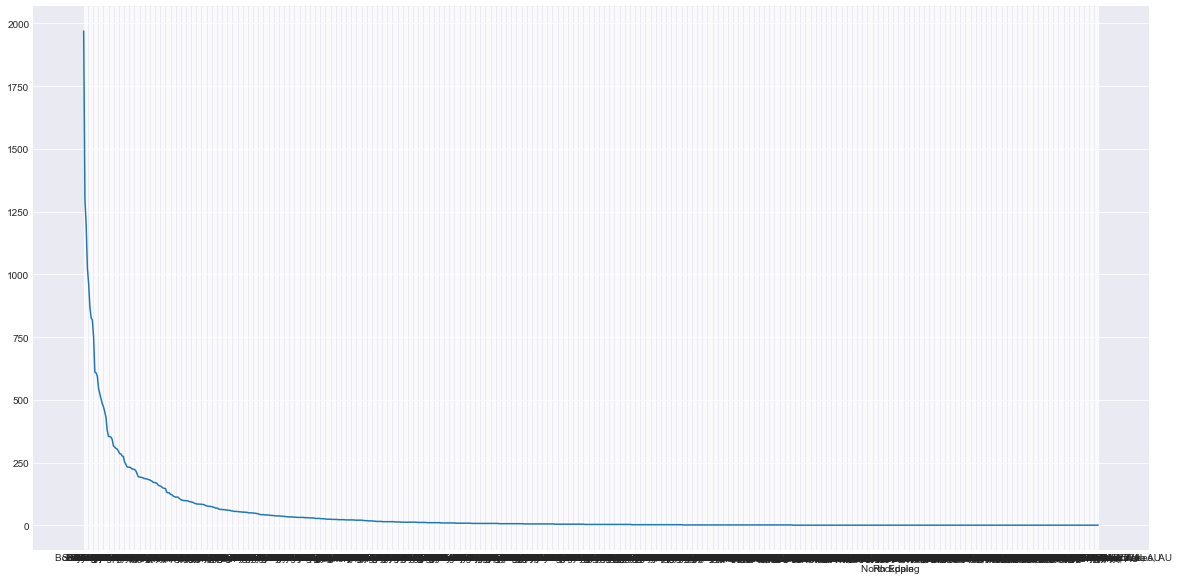

In [201]:
plt.plot(Number)

In [203]:
Number2=FACS['LGA (Local Government Areas)'].value_counts()
Number2
#Total in the table indicates all sub-categories for that category including "not stated" or "other" property types

Total                      1155
Lake Macquarie              280
Waverley                    280
Blacktown                   280
Inner West                  280
Central Coast               280
Parramatta                  280
Coffs Harbour               280
Liverpool                   280
Ryde                        280
Willoughby                  280
Strathfield                 280
Canterbury-Bankstown        280
North Sydney                280
Shellharbour                280
Wollongong                  280
Maitland                    280
Sydney                      280
Port Macquarie-Hastings     280
Canada Bay                  280
Hornsby                     280
Cumberland                  280
Campbelltown                280
Byron                       280
Northern Beaches            280
Blue Mountains              280
Newcastle                   280
Penrith                     280
Randwick                    280
Mid-Coast                   272
                           ... 
Liverpoo

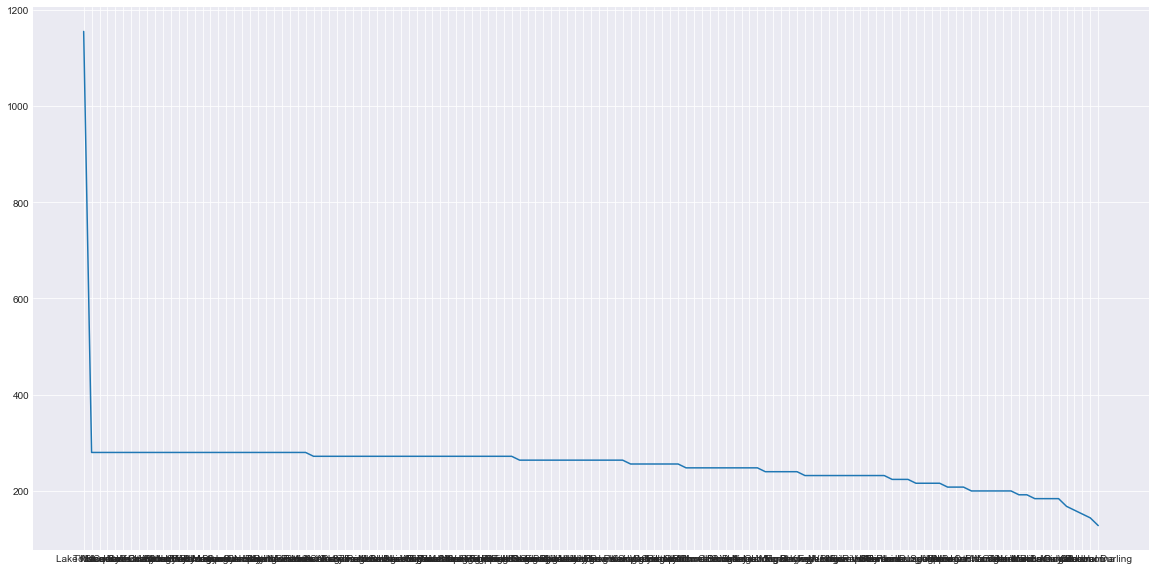

In [204]:
plt.plot(Number2)

In [184]:
#Quartiles for weekly cost of 1 room Airbnbs
ratio.cost_per_room.quantile([0.25,0.5,0.75])

0.25     464.333333
0.50     696.500000
0.75    1050.000000
Name: cost_per_room, dtype: float64

(0, 10000)

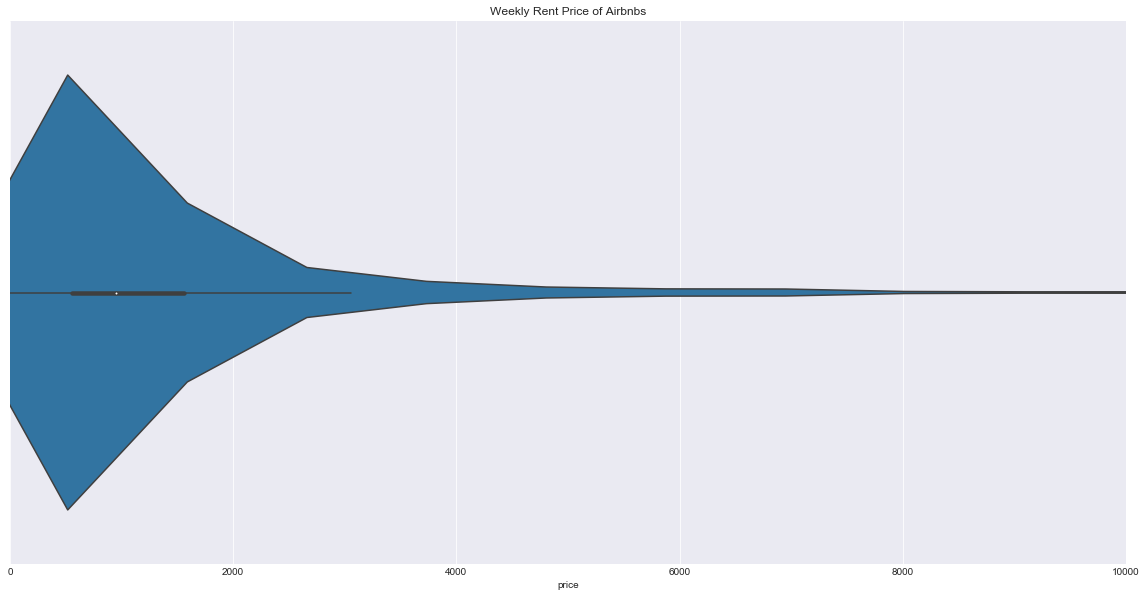

In [189]:
#violn plot of Airbnb price distribution
import seaborn as sns
ax = sns.violinplot(x=CBP['price'], inner = 'box')
plt.title('Weekly Rent Price of Airbnbs')
plt.xlim(0, 10000)
#plt.ytick=(fontsize = 15,rotation='horiontal')

In [186]:
import seaborn as sns
ax = sns.violinplot(x=FACS['Median Weekly Rent for New Bonds\n$'], inner = 'box')

KeyError: 'Median Weekly Rent for New Bonds\n$'